# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
x_data = dataset.iloc[:, :-1].values
y_data = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## Training the K-NN model on the Training set

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [7]:
y_pred = classifier.predict(x_test_scaled)

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Visualising the Training set results

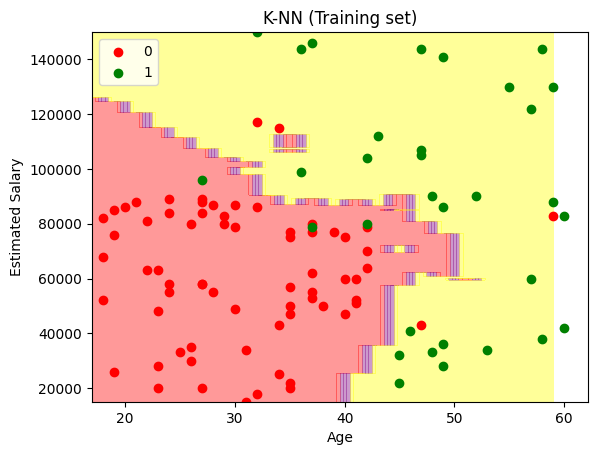

In [15]:
from matplotlib.colors import ListedColormap

step_size = 2
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))
z = classifier.predict(sc.transform(np.array([xx.ravel(), yy.ravel()]).T))

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=ListedColormap(('red', 'purple', "yellow")), alpha=0.4)

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1], c = ('red', 'green')[i], label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()